In [42]:
# 데이터 불러오기
train_df = pd.read_csv("train.csv")
train_df.tail(10)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
3362786,1799,2018-07-10,18:00:55,560b85cb59,325,NaN,1,0
3362787,1799,2018-07-11,11:57:34,fcf1b338aa,350,NaN,2,0
3362788,1799,2018-07-15,18:24:57,b96ac1d7a8,275,NaN,6,0
3362789,1799,2018-07-17,11:26:44,b7846c9389,350,NaN,1,0
3362790,1799,2018-07-17,14:44:54,e73e0f0390,350,NaN,1,0
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0
3362795,1799,2018-07-30,10:58:53,42d354807a,325,NaN,0,0


In [43]:
# 총 8개의 column과 3362796개의 row를 확인 할 수 있었습니다.
# 약 3백3십6만개의 row데이터에 비해 변수(column)가 적었습니다.

In [45]:
# installments column을 제외한 다른 column 들은 3362796개의 row를 가진 것을 알 수 있다.
# installments에서 결측치 확인 installments는 할부개월수로 일시불일 경우 값이 비어 NaN으로 표시됨.
train_df.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments      16860
days_of_week    3362796
holyday         3362796
dtype: int64

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [4]:
# 일시불인 경우 값을 1로 생각해서 결측치를 1로 채움
credit_df["installments"] = credit_df["installments"].fillna(1)

In [5]:
# 다시 column들의 개수를 확인하니 결측치가 제거된 것을 확인
credit_df.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments    3362796
days_of_week    3362796
holyday         3362796
dtype: int64

In [6]:
# 결측치를 제거했으니 데이터에 있는 store의 수와 신용카드 개수를 확인
print(credit_df["store_id"].value_counts())
print(credit_df["card_id"].value_counts())

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
657         1
632         1
727         1
201         1
991         1
Name: store_id, Length: 1775, dtype: int64
53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
             ... 
ad156acef1      1
5358b5e1e9      1
ae88b1ce5d      1
fc64158899      1
64496954b1      1
Name: card_id, Length: 922522, dtype: int64


In [7]:
# 수집된 데이터에서 조사된 store과 card의 수는 각각 1775개, 922522개 였다.
# 여기서 각 store의 거래횟수와 card의 거래횟수를 알 수 있었다. 0번 상점이 제일 많은 횟수인 68773회 였고 card의 경우 2년동안 835회의 
# 결제건수를 확인할 수 있었다.

In [19]:
print(len(credit_df["installments"].unique()))

17


In [20]:
# 할부 개월수의 unique 값도 알아보자
print(credit_df["installments"].value_counts())

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64


In [21]:
# 할부월수를 보면 일시불이 가장 많았고 그 다음으로 3개월 2개월의 할부개월수를 확인할 수 있었다. 할부 개월수가 4개월인 경우가 7위에 있는데 
# 우리가 생활습관에서 4개월 할부는 잘 안하는 모습을 볼 수 있었다. 

In [24]:
credit_df["store_id"].value_counts().head(10) 

0       68773
753     39318
105     36063
1342    33335
428     33285
221     31409
161     27170
1038    25694
323     25221
1366    24946
Name: store_id, dtype: int64

In [ ]:
credit_df

In [23]:
credit_df["card_id"].value_counts().reset_index(name="count").head(10) 

,index,count
0,53817035d4,835
1,93bba5079c,512
2,994b71a98a,458
3,18549044f3,453
4,6b2d18c5c5,433
5,10a5c30cda,425
6,06e61d93b8,423
7,5cf0b23473,413
8,0177959e09,409
9,a9a1e3d97d,405


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

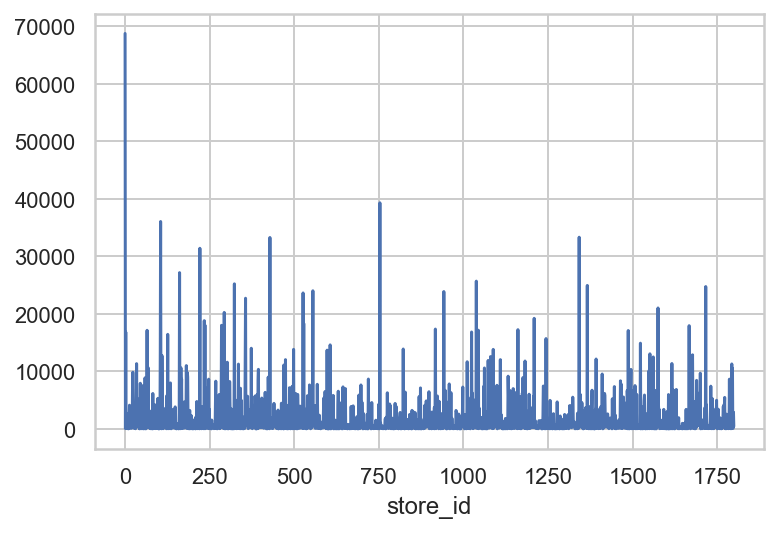

In [32]:
credit_df.groupby("store_id").count()["amount"].plot()

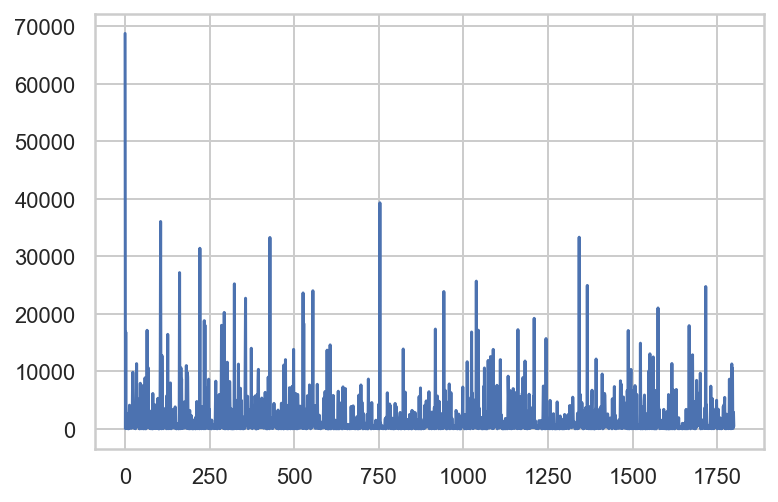

In [33]:
plt.plot(credit_df.groupby("store_id").count()["amount"])

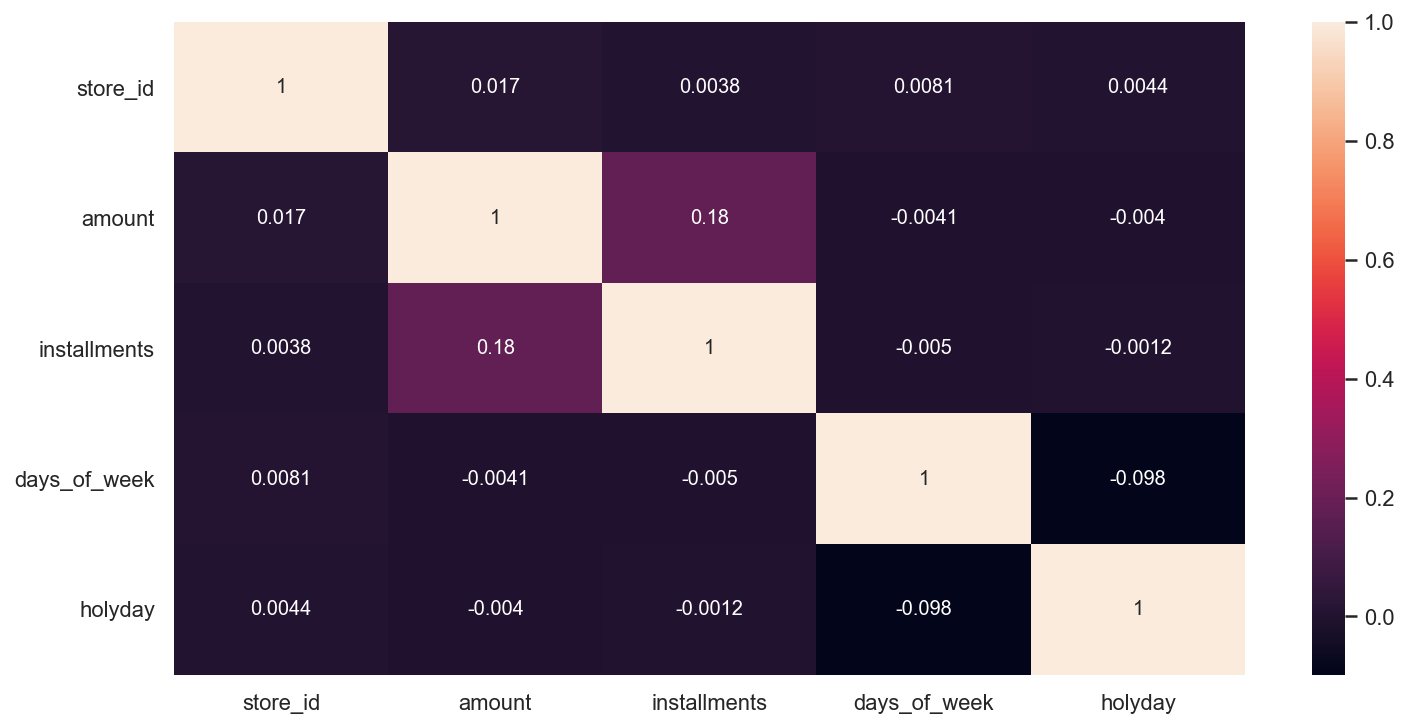

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(credit_df.corr(), annot=True)

In [41]:
# 휴일전날 매출의 상관관계를 히트맵으로 보기
# 시간대별로 점심과 저녁시간 amount의 상관관계 보기

In [27]:
credit_df[credit_df["installments"] > 1]

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
152,0,2016-12-21,10:48:04,65d5e33f69,445,3.0,2,0
155,0,2016-12-21,11:16:17,65d5e33f69,-445,3.0,2,0
206,0,2016-12-21,14:26:24,4a8e737d2c,277,2.0,2,0
311,0,2016-12-21,22:17:30,3f59e8684b,375,3.0,2,0
651,0,2016-12-24,11:59:37,583d5dd51c,408,3.0,5,0
...,...,...,...,...,...,...,...,...
3362429,1799,2017-05-14,21:14:12,54b471994c,1500,3.0,6,0
3362486,1799,2017-07-19,14:30:10,e47d9a18e4,3850,3.0,2,0
3362514,1799,2017-08-18,19:08:43,f293d9dc0c,300,2.0,4,0
3362701,1799,2018-02-19,18:34:25,be98bd957b,1175,3.0,0,0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [8]:
a = 1.0
type(a)

float

In [20]:
credit_df["installments"] = credit_df["installments"].fillna(1)

In [21]:
credit_df.groupby(["store_id", "date"]).sum()["amount"].reset_index()

,store_id,date,amount
0,0,2016-12-14,0
1,0,2016-12-19,3055
2,0,2016-12-20,5918
3,0,2016-12-21,16747
4,0,2016-12-22,12014
...,...,...,...
480155,1799,2018-07-17,700
480156,1799,2018-07-19,875
480157,1799,2018-07-22,350
480158,1799,2018-07-25,300


In [22]:
credit_df.groupby("store_id").sum()["amount"].reset_index() #상점개수 = 1775개

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312
...,...,...
1770,1795,1319911
1771,1796,15372
1772,1797,49645
1773,1798,110011


In [25]:
credit_df.sum()["amount"].reset_index() # 고유카드개수 = 922522개 (한 사람당 1개의 카드를 가지고 있다하면 922522명의 사람의 거래량을 알 수 있음)

,card_id,amount
0,000009e765,10
1,00000f9eaa,331
2,0000134335,90
3,000024f480,80
4,000036a26b,720
...,...,...
922517,ffffabcd67,225
922518,ffffd0294d,3432
922519,ffffe10b92,605
922520,fffffa0825,76
